# Классификация
Один из наболее простых методов классификации - это дискриминантный анализ. \
Зависимая переменная (y) - категориальная \
Независимые переменные (X)- непрерывные \
На основании некоторых признаков (независимых переменных) объект можно причислить к одной из заранее **заданных** групп. \
Обучение с учителем.

#### Дискриминантная функция
$y(x) = w_0 + w_1*x_1 + w_2*x_2 + ... + w_n*x_n = w_0 + w^Tx$ 

Задача - найти вектор $w$ и скаляр $w_0$, чтобы функция с максимальной точностью разделяла группы. \
Метод решения - линейный дискриминантный анализ (LDA - Linear Discriminant Analysis)

Геометрический смысл дискриминантной функции. \
Рассмотрим на примере двух классов (красные и синие). \
Есть набор элементов. Провести такую прямую, на которую далее проецируем все точки. По сути перемещаем в одномерную плоскость. Далее проводим перепендикляр к этой прямой таким образом, чтобы отделить наши два класса. Вот этот перепендикуляр - это и есть решение.

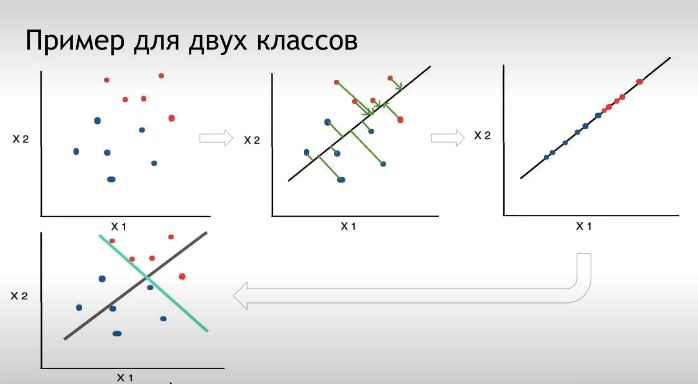

Метод для решения - критерий Фишера. \
Найти центры групп $x^{(1)}$ и $x^{(2)}$ синих и красных точек (аналогия - центр масс). \
Расстояние между этими точками - должно быть максимальным.\
Если начнем проецировать на нормаль точки, то можем увидеть нахлест (см. гистограмму) - разброс прокций $s$. \
Критерий Фишера $J(w)$. Задача состоит в том, чтобы "поворачивая" нормаль, найти такое положение при котором будет максимально возможное расстояние при минимальном разбросе при проецировании.

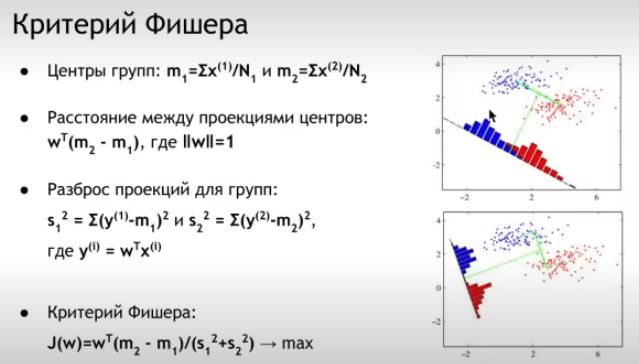

Если классов больше двух, то количество дискр. функций становится равным количеству классов. Точка х будет относиться к той группе, для которой соответсвующия диск. функция имеет наибольшее значение.

In [155]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style()

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [156]:
# Создаем тестовый датасет с использованием make_blobs
# Функция make_blobs() генерирует данные из изотропных гауссовских распределений
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=2)

<AxesSubplot:>

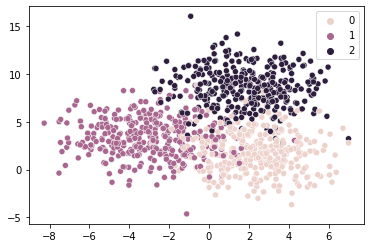

In [157]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [158]:
# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

<AxesSubplot:>

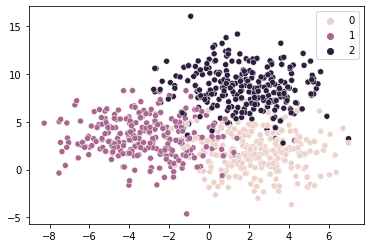

In [159]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

In [160]:
# Перед моделированием необходимо смаштабировать данные - провести стандартизацию.
# Для этого в библиотеке sklearn есть функция StandardScaler(). 
# Cоздаем объект функции StandardScaler(). Далее, используя fit_transform() преобразуем данные.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

<AxesSubplot:>

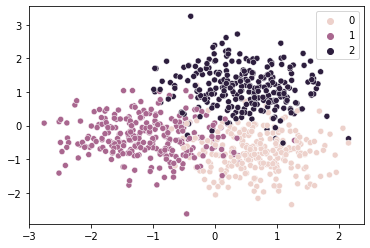

In [161]:
# Можно еще раз визуализировать и убедится что все ок
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

In [162]:
# Выполним то же самое преобразование для тестовых данных
X_test = scaler.transform(X_test)

In [163]:
# импортируем LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [164]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [165]:
# проведем оценку на тестовых данных
# средняя точность 
lda.score(X_test, y_test)

0.885

In [166]:
# набор предсказанных ответов 
y_ = lda.predict(X_test)
y_

array([0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2,
       2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2,
       0, 2])

In [167]:
# набор реальных ответов из тестовой выборки
y_test

array([2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0,
       2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2,
       2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0,
       1, 2])

In [168]:
lda.__dict__

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': None,
 'store_covariance': False,
 'tol': 0.0001,
 'covariance_estimator': None,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2]),
 'priors_': array([0.32625, 0.34125, 0.3325 ]),
 '_max_components': 2,
 'means_': array([[ 0.65757594, -0.78541396],
        [-1.07872248, -0.34869513],
        [ 0.46189443,  1.12852186]]),
 'xbar_': array([6.82957144e-17, 3.15365900e-16]),
 'explained_variance_ratio_': array([0.65945353, 0.34054647]),
 'scalings_': array([[ 0.9562326 ,  1.28716029],
        [ 1.48367812, -0.89984602]]),
 'intercept_': array([-2.47015938, -2.85213315, -3.42853686]),
 'coef_': array([[ 1.48613787, -2.19360453],
        [-2.86440412, -1.33093142],
        [ 1.48158023,  3.51832729]])}

Здесь: \
коэф. дискр. функции **'coef_'** \
своб. коэф. **'intercept_'** \
координаты центров **means_**


C:\Users\User\AppData\Local\Temp/ipykernel_12884/102934504.py:15: UserWarning: The following kwargs were not used by contour: 'cm'
  plt.contourf(xx, yy, zz, cm=plt.cm.coolwarm, alpha=0.05)


<AxesSubplot:>

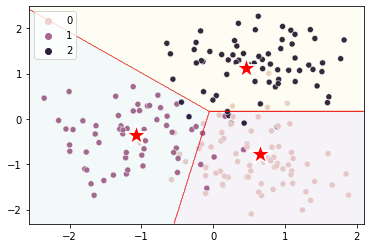

In [169]:
# Можно выполнить визуализацию и посмотреть что получилось
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)

# границы графика
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
# шаг
N = 500
# по заданным точка сформировать сетку 
xx, yy = np.meshgrid(np.linspace(x1, x2, N), np.linspace(y1, y2, N))
# предсказания для каждой точки
zz = lda.predict(np.vstack([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

# визуализируем
plt.contourf(xx, yy, zz, cm=plt.cm.coolwarm, alpha=0.05)
plt.contour(xx, yy, zz, colors='r', linewidths=0.2)

# центры
C = lda.means_
sns.scatterplot(x=C[:, 0], y=C[:, 1], color='r', marker='*', s=500)